In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Resizing
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# EfficientNet preprocessing (replace divide-by-255! normalization gave errors)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# Build model
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    Resizing(224, 224), #resize on-the-fly during training.
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 92ms/step - accuracy: 0.8163 - loss: 0.5569 - val_accuracy: 0.9038 - val_loss: 0.2812
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9029 - loss: 0.2817 - val_accuracy: 0.9072 - val_loss: 0.2692
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9156 - loss: 0.2432 - val_accuracy: 0.9109 - val_loss: 0.2566
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9249 - loss: 0.2197 - val_accuracy: 0.9110 - val_loss: 0.2579
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9348 - loss: 0.1894 - val_accuracy: 0.9095 - val_loss: 0.2630
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9369 - loss: 0.1775 - val_accuracy: 0.9134 - val_loss: 0.2623
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9440 - loss: 0.1572 - val_accuracy: 0.9134 - val_loss: 0.2599
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9514 - loss: 0.1405 - 

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
# ------------------------------
# Predictions
# ------------------------------
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step
              precision    recall  f1-score   support

    airplane       0.92      0.92      0.92      1000
  automobile       0.96      0.94      0.95      1000
        bird       0.94      0.86      0.90      1000
         cat       0.85      0.81      0.83      1000
        deer       0.88      0.92      0.90      1000
         dog       0.88      0.85      0.87      1000
        frog       0.90      0.95      0.92      1000
       horse       0.91      0.95      0.93      1000
        ship       0.93      0.96      0.95      1000
       truck       0.95      0.94      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



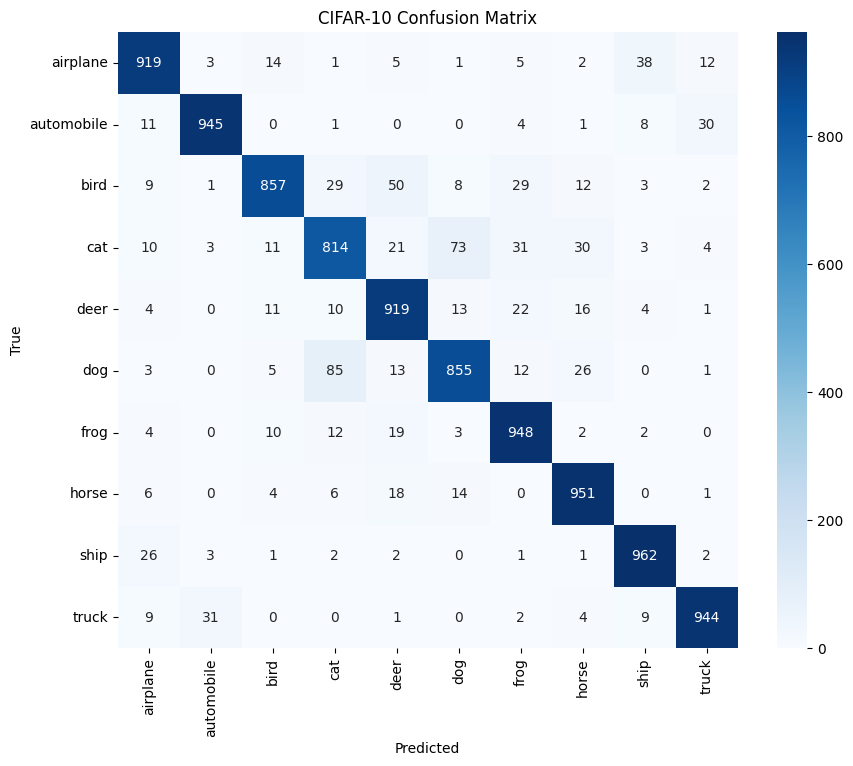

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CIFAR-10 Confusion Matrix")
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# Load CIFAR-10
# -------------------------------
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
# -------------------------------
# Data augmentation
# -------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # use 20% for validation
)


In [3]:
# Preprocess input
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

train_gen = datagen.flow(X_train, y_train, batch_size=64, subset='training')
val_gen = datagen.flow(X_train, y_train, batch_size=64, subset='validation')

In [4]:
# -------------------------------
# Build EfficientNetB0 model
# -------------------------------
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False  # freeze for initial training

model = Sequential([
    Resizing(224, 224),
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:

# -------------------------------
# Train top layers
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history1 = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 104ms/step - accuracy: 0.7461 - loss: 0.7691 - val_accuracy: 0.8432 - val_loss: 0.4471
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8381 - loss: 0.4643 - val_accuracy: 0.8550 - val_loss: 0.4126
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8487 - loss: 0.4313 - val_accuracy: 0.8598 - val_loss: 0.4064
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8610 - loss: 0.3946 - val_accuracy: 0.8545 - val_loss: 0.4099
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8693 - loss: 0.3684 - val_accuracy: 0.8651 - val_loss: 0.3977
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8751 - loss: 0.3570 - val_accuracy: 0.8708 - val_loss: 0.3738
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8777 - loss: 0.3456 - val_accuracy: 0.8729 - val_loss: 0.3752
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8805 - loss: 0.3320 - val_accura

In [6]:
# -------------------------------
# Fine-tune last few layers
# -------------------------------
base_model.trainable = True

# Freeze all except last 20 layers
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[early_stop]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 101ms/step - accuracy: 0.8507 - loss: 0.4470 - val_accuracy: 0.8820 - val_loss: 0.3623
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9035 - loss: 0.2746 - val_accuracy: 0.8922 - val_loss: 0.3265
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9171 - loss: 0.2352 - val_accuracy: 0.8945 - val_loss: 0.3153
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9285 - loss: 0.2004 - val_accuracy: 0.8962 - val_loss: 0.3132
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9400 - loss: 0.1712 - val_accuracy: 0.9041 - val_loss: 0.2905
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9466 - loss: 0.1529 - val_accuracy: 0.9025 - val_loss: 0.3016
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9499 - loss: 0.1473 - val_accuracy: 0.9082 - val_loss: 0.2911
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9536 - loss: 0.1322 -

In [7]:
# -------------------------------
# Evaluate on test set
# -------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 27s - 87ms/step - accuracy: 0.9387 - loss: 0.1967
Test accuracy: 0.9387


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [15]:
# -------------------------------
# Classification report
# -------------------------------

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.96      0.94      0.95      1000
  automobile       0.96      0.97      0.96      1000
        bird       0.95      0.92      0.93      1000
         cat       0.91      0.84      0.88      1000
        deer       0.93      0.93      0.93      1000
         dog       0.90      0.91      0.90      1000
        frog       0.92      0.98      0.94      1000
       horse       0.96      0.96      0.96      1000
        ship       0.96      0.97      0.97      1000
       truck       0.94      0.96      0.95      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



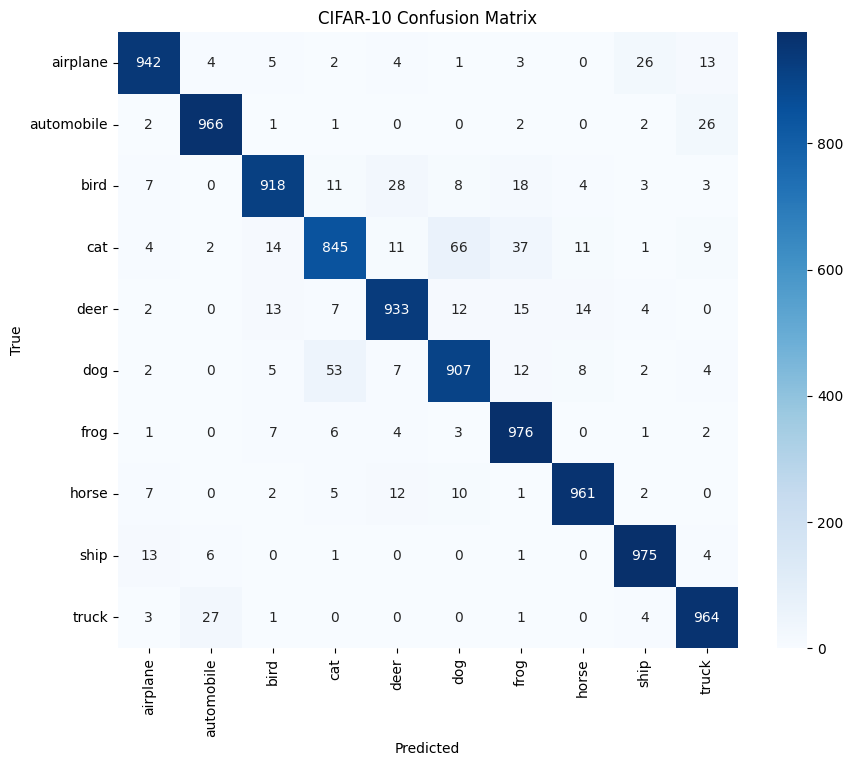

In [16]:
# -------------------------------
# Confusion Matrix
# -------------------------------

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CIFAR-10 Confusion Matrix")
plt.show()

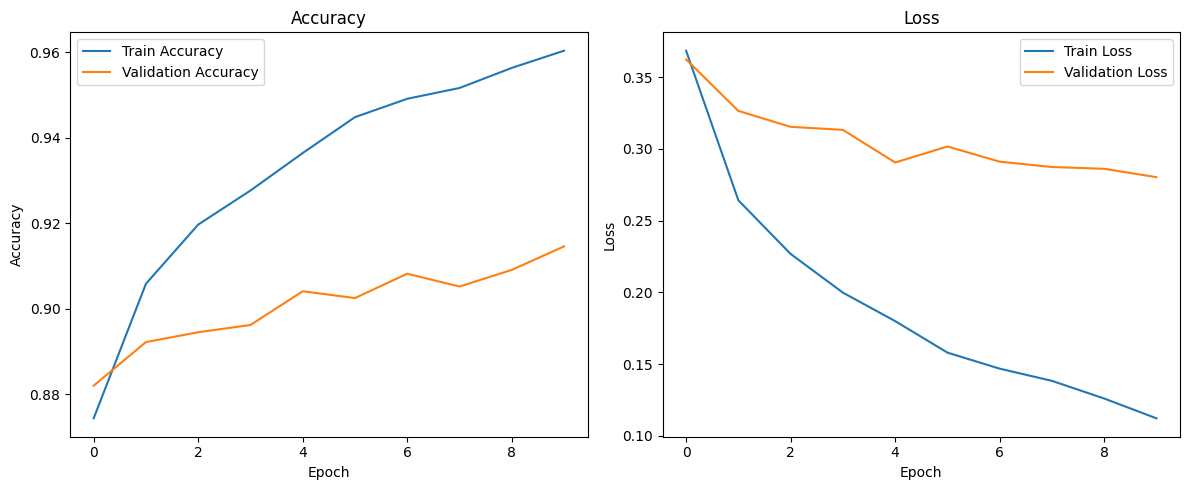

In [20]:
#-------------------------------
# Plot training history
# -------------------------------

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()